In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from text2topics import reports
from text2topics import utilities
from text2topics import clean
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = utilities.create_spelling_dictionary(wordlist_dir, wordlists)

In [7]:
title = "LH"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LH/baseline

Average verified rate: 0.9315656653772277

Average of error rates: 0.08061743642968344

Total token count: 4900581



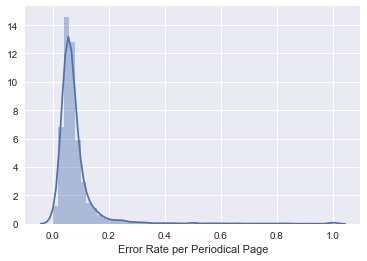

In [10]:
stats = reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = reports.get_errors_summary( stats )
reports.top_errors( errors_summary, 500 )

[('ñ', 20117),
 ('d', 7589),
 ('m', 6444),
 ('¥', 5489),
 ("'", 4618),
 ('-', 4322),
 ('tion', 3613),
 ('in-', 3484),
 ('e', 3414),
 ('con-', 3243),
 ('re-', 3138),
 ('n', 2877),
 (')', 2532),
 ('t', 2468),
 ('w', 2098),
 ('r', 2082),
 ('ex-', 1915),
 ('dis-', 1830),
 ('de-', 1748),
 ('g', 1739),
 ('f', 1702),
 ('ment', 1626),
 ('be-', 1622),
 ('com-', 1516),
 ('/', 1409),
 ('pro-', 1363),
 ('+', 1250),
 ('(', 1234),
 ('tions', 984),
 ('un-', 970),
 ('per-', 942),
 ('pre-', 926),
 ('im-', 905),
 ('*', 823),
 ('al-', 738),
 ('en-', 727),
 ('(q)', 719),
 ('x', 701),
 ('ac-', 684),
 ('co', 669),
 ('ad-', 642),
 ('ments', 622),
 ('u', 622),
 ('ap-', 607),
 ('=', 607),
 ('at-', 597),
 ('¡', 592),
 ('(see', 557),
 ('treat-', 555),
 ('(e)', 544),
 ('ful', 532),
 ('sub-', 519),
 ('%', 518),
 ('ical', 508)]

## Check Special Character Use

In [12]:
reports.tokens_with_special_characters(errors_summary)[:100]

[('ñ', 20117),
 ('¥', 5489),
 (')', 2532),
 ('/', 1409),
 ('+', 1250),
 ('(', 1234),
 ('*', 823),
 ('(q)', 719),
 ('=', 607),
 ('¡', 592),
 ('(see', 557),
 ('(e)', 544),
 ('%', 518),
 ('_', 362),
 ('(c)', 332),
 (']', 328),
 ('¥¥', 250),
 ('ã', 218),
 ('(western)', 199),
 ('(d', 197),
 ('(or', 187),
 ('(southern)', 169),
 ('•', 160),
 ('(concluded', 157),
 ('(a)', 150),
 ('[', 146),
 ('\\', 138),
 ('¥¥¥', 138),
 ('(the', 136),
 ('(continued', 130),
 ('(west)', 113),
 ('ó', 110),
 ('ñthe', 108),
 ('(and', 108),
 ('(mich', 107),
 ('england)', 97),
 ('(payable', 97),
 ('++', 92),
 ('ô', 90),
 ('(a', 88),
 ('>', 88),
 ('(northern)', 86),
 ('(eastern)', 86),
 ('chesapeake)', 85),
 ('southern)', 85),
 ('(which', 82),
 ('office)', 80),
 ('`', 79),
 ('¥¥¥¥', 77),
 ('[the', 77),
 ('year)', 74),
 ('**', 69),
 ('tennessee)', 68),
 ('#', 68),
 ('ña', 67),
 ('(south)', 65),
 ('(north)', 65),
 ('(east)', 64),
 ('(about', 60),
 ('<', 60),
 ('••', 59),
 ('(b)', 55),
 ('(not', 54),
 ('(i', 52),
 ('(i)'

## Correction 1 -- Normalize Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = cycle
cycle = "correction1"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LH/correction1

Average verified rate: 0.9421330137560743

Average of error rates: 0.06851427088738972

Total token count: 4864760



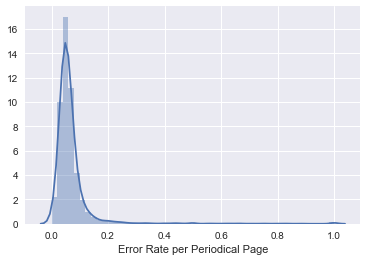

In [14]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('d', 7847),
 ('m', 6629),
 ("'", 4802),
 ('-', 4660),
 ('e', 4171),
 ('tion', 3618),
 ('in-', 3497),
 ('con-', 3245),
 ('re-', 3141),
 ('n', 3026),
 ('t', 2667),
 ('r', 2267),
 ('w', 2151),
 ('ex-', 1917),
 ('dis-', 1832),
 ('f', 1791),
 ('g', 1782),
 ('de-', 1751),
 ('ment', 1630),
 ('be-', 1622),
 ('com-', 1518),
 ('pro-', 1367),
 ('tions', 986),
 ('un-', 972),
 ('per-', 943),
 ('q', 931),
 ('pre-', 927),
 ('im-', 905),
 ('al-', 741),
 ('en-', 728),
 ('x', 727),
 ('ac-', 686),
 ('co', 678),
 ('ad-', 642),
 ('u', 637),
 ('ments', 624),
 ('ap-', 608),
 ('at-', 597),
 ('treat-', 556),
 ('ful', 532),
 ('sub-', 519),
 ('ical', 508),
 ('chil-', 478),
 ('ture', 471),
 ('ers', 457),
 ('dren', 454),
 ('di-', 441),
 ('pa-', 437),
 ('an-', 416),
 ('--', 401)]

## Correction 2 -- Correct Line Endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LH/correction2

Average verified rate: 0.9756305259727289

Average of error rates: 0.03717861961598339

Total token count: 4755950



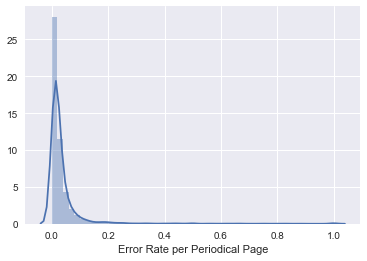

In [17]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('d', 7834),
 ('m', 6616),
 ("'", 4802),
 ('-', 4607),
 ('e', 4150),
 ('n', 3019),
 ('t', 2644),
 ('r', 2251),
 ('w', 2146),
 ('g', 1776),
 ('f', 1751),
 ('q', 931),
 ('x', 727),
 ('co', 676),
 ('u', 636),
 ('--', 401),
 ('k', 380),
 ('mt', 340),
 ('th', 274),
 ('ni', 271),
 ('mo', 256),
 ('boulder-colorado', 234),
 ('pa', 232),
 ('lb', 227),
 ('z', 225),
 ('tv', 205),
 ('oz', 205),
 ('va', 156),
 ('li', 144),
 ('money-order', 137),
 ('mi', 133),
 ('ti', 132),
 ('io', 122),
 ('mm', 119),
 ('---', 115),
 ('cook-book', 115),
 ('tion', 115),
 ('si', 109),
 ('ri', 108),
 ('hydro-electric', 107),
 ('re', 104),
 ('al', 104),
 ('wm', 103),
 ('ft', 99),
 ('ph', 96),
 ('ky', 93),
 ('feeble-minded', 93),
 ('best-equipped', 91),
 ('nauheim', 91),
 ('treatment-rooms', 87)]

## Correction 3 -- Remove Extra Dashes 

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LH19040701-V19-07-page15.txt: [('eter-', 'eter'), ('re-', 're'), ('re-', 're')]
LH19040701-V19-07-page16.txt: [('judg-', 'judg')]
LH19040701-V19-07-page17.txt: [('Clothing.-', 'Clothing.'), ('-harmful', 'harmful')]
LH19040701-V19-07-page18.txt: [('-', '')]
LH19040701-V19-07-page19.txt: [('house-', 'house'), ('care-', 'care')]
LH19040701-V19-07-page2.txt: [('Tri-', 'Tri'), ('-', ''), ('-', '')]
LH19040701-V19-07-page23.txt: [('-', '')]
LH19040701-V19-07-page24.txt: [('oc-', 'oc'), ('sug-', 'sug')]
LH19040701-V19-07-page3.txt: [('-', ''), ('Sensa-', 'Sensa'), ('-', ''), ('-', '')]
LH19040701-V19-07-page30.txt: [('Fourth-of-', 'Fourth-of'), ('-', '')]
LH19040701-V19-07-page32.txt: [('degen-', 'degen')]
LH19040701-V19-07-page34.txt: [('-', ''), ('-', ''), ('-', ''), ('-', '')]
LH19040701-V19-07-page35.txt: [('-', ''), ('Washing-', 'Washing'), ('-', ''), ('Washing--', 'Washing-'), ('-', ''), ('Res-', 'Res')]
LH19040701-V19-07-page36.txt: [('-trees', 'trees'), ('-..', '..')]
LH19040801-V19-0

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LH/correction3

Average verified rate: 0.9778234103505604

Average of error rates: 0.03415568240788791

Total token count: 4757810



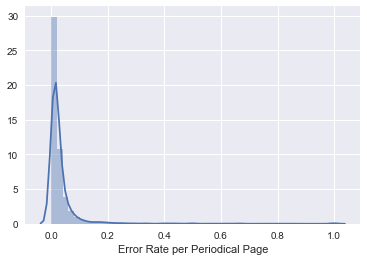

In [20]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('d', 7846),
 ('m', 6626),
 ("'", 4896),
 ('e', 4188),
 ('n', 3044),
 ('t', 2706),
 ('r', 2317),
 ('w', 2162),
 ('g', 1790),
 ('f', 1782),
 ('q', 933),
 ('x', 826),
 ('co', 723),
 ('u', 640),
 ('k', 392),
 ('mt', 343),
 ('th', 275),
 ('ni', 273),
 ('mo', 261),
 ('pa', 247),
 ('z', 238),
 ('lb', 234),
 ('oz', 232),
 ('tv', 205),
 ('re', 179),
 ('-', 170),
 ('va', 161),
 ('li', 147),
 ('ti', 137),
 ('al', 136),
 ('boulder-colorado', 136),
 ('mi', 133),
 ('io', 123),
 ('mm', 121),
 ('ri', 117),
 ('tion', 116),
 ('si', 112),
 ('wm', 103),
 ('ft', 101),
 ('ph', 97),
 ('ky', 93),
 ('nauheim', 91),
 ('es', 87),
 ('ga', 85),
 ('oo', 84),
 ('se', 83),
 ("''", 82),
 ('id', 80),
 ('money-order', 79),
 ('ne', 76)]

## Correction 4 -- Remove Extra Quotation Marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
        print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LH19040701-V19-07-page32.txt: [("'changing", 'changing')]
LH19040701-V19-07-page7.txt: [("'the", 'the'), ("'s", 's'), ("'Lean", 'Lean'), ("'s", 's')]
LH19040801-V19-08-page10.txt: [("'one", 'one')]
LH19040801-V19-08-page13.txt: [("'s", 's')]
LH19040801-V19-08-page16.txt: [("'-hey", '-hey')]
LH19040801-V19-08-page17.txt: [("'heat", 'heat'), ("'heat", 'heat')]
LH19040801-V19-08-page29.txt: [("'s", 's'), ("'tis", 'tis')]
LH19040801-V19-08-page36.txt: [("'Dishes", 'Dishes')]
LH19040901-V19-09-page10.txt: [("'D.", 'D.')]
LH19040901-V19-09-page31.txt: [("''Sanitary", 'Sanitary'), ("''Connection", 'Connection'), ("'s", 's')]
LH19040901-V19-09-page33.txt: [("''horse", 'horse')]
LH19040901-V19-09-page35.txt: [("'States", 'States')]
LH19040901-V19-09-page5.txt: [("'relative", 'relative')]
LH19041001-V19-10-page10.txt: [("'d", 'd')]
LH19041001-V19-10-page11.txt: [("'ud", 'ud'), ("'way", 'way')]
LH19041001-V19-10-page15.txt: [("'Why", 'Why'), ("'Out", 'Out'), ("'Well.", 'Well.')]
LH19041001-V19-10

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LH/correction4

Average verified rate: 0.9781562280025281

Average of error rates: 0.033634665282823044

Total token count: 4757649



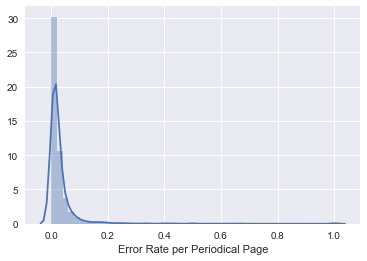

In [23]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('d', 7861),
 ('m', 6631),
 ("'", 4656),
 ('e', 4199),
 ('n', 3053),
 ('t', 2743),
 ('r', 2320),
 ('w', 2168),
 ('g', 1792),
 ('f', 1789),
 ('q', 933),
 ('x', 826),
 ('co', 725),
 ('u', 640),
 ('k', 392),
 ('mt', 343),
 ('th', 276),
 ('ni', 273),
 ('mo', 261),
 ('pa', 247),
 ('z', 240),
 ('lb', 234),
 ('oz', 232),
 ('tv', 205),
 ('re', 179),
 ('-', 171),
 ('va', 161),
 ('li', 149),
 ('ti', 138),
 ('boulder-colorado', 136),
 ('al', 136),
 ('mi', 133),
 ('io', 123),
 ('mm', 121),
 ('tion', 117),
 ('ri', 117),
 ('si', 112),
 ('wm', 103),
 ('ft', 102),
 ('ph', 97),
 ('ky', 93),
 ('nauheim', 91),
 ('es', 88),
 ('oo', 87),
 ('ga', 85),
 ('se', 83),
 ('id', 80),
 ('il', 79),
 ('money-order', 79),
 ('ne', 79)]

## Correction 5 -- Rejoin Burst Words

In [25]:
# %load shared_elements/rejoin_burst_words.py
prev = cycle
cycle = "correction5"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LH19050701-V20-07-page36.txt: [('Ii', 'Ii')]
LH19051001-V20-10-page17.txt: [('If', 'If')]
LH19051201-V20-12-page13.txt: [('If', 'If')]
LH19070101-V22-01-page5.txt: [(' w h i c h ', 'which')]
LH19070601-V22-06-page15.txt: [('If', 'If')]
LH19081001-V23-10-page5.txt: [('Ir', 'Ir')]
LH19081101-V23-11-page23.txt: [(' t h r e e ', 'three')]
LH19090201-V24-02-page7.txt: [('If', 'If')]
LH19090401-V24-04-page7.txt: [('It', 'It'), ('Is', 'Is')]
LH19090501-V24-05-page7.txt: [('Ir', 'Ir')]
LH19090801-V24-08-page7.txt: [('Or', 'Or'), ('Ir', 'Ir')]
LH19100201-V25-02-page53.txt: [('To', 'To')]
LH19100301-V25-03-page7.txt: [('It', 'It'), ('Iv', 'Iv')]
LH19100401-V25-04-page20.txt: [('If', 'If')]
LH19100501-V25-05-page39.txt: [('It', 'It')]
LH19100701-V25-07-page3.txt: [('It', 'It')]
LH19100901-V25-09-page19.txt: [(' w h i c h ', 'which')]
LH19101001-V25-10-page30.txt: [(' c o u l d ', 'could')]
LH19101101-V25-11-page9.txt: [(' S t o r m s ', 'Storms')]
LH19110501-V26-05-page25.txt: [('If', 'If')]
LH19

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LH/correction5

Average verified rate: 0.9781643555515946

Average of error rates: 0.03362573949143747

Total token count: 4757588



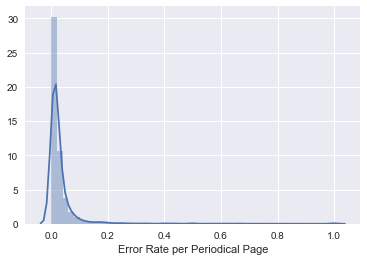

In [26]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('d', 7856),
 ('m', 6629),
 ("'", 4656),
 ('e', 4184),
 ('n', 3050),
 ('t', 2734),
 ('r', 2315),
 ('w', 2165),
 ('g', 1790),
 ('f', 1788),
 ('q', 933),
 ('x', 826),
 ('co', 725),
 ('u', 639),
 ('k', 388),
 ('mt', 343),
 ('th', 276),
 ('ni', 273),
 ('mo', 261),
 ('pa', 247),
 ('z', 240),
 ('lb', 234),
 ('oz', 232),
 ('tv', 205),
 ('re', 179),
 ('-', 171),
 ('va', 161),
 ('li', 149),
 ('ti', 138),
 ('boulder-colorado', 136),
 ('al', 136),
 ('mi', 133),
 ('io', 123),
 ('mm', 121),
 ('tion', 117),
 ('ri', 117),
 ('si', 112),
 ('wm', 103),
 ('ft', 102),
 ('ph', 97),
 ('ky', 93),
 ('nauheim', 91),
 ('es', 88),
 ('oo', 87),
 ('ga', 85),
 ('se', 83),
 ('id', 80),
 ('il', 79),
 ('money-order', 79),
 ('ne', 79)]

## Correction 6 -- Rejoin Split Words

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LH19040701-V19-07-page15.txt: [('riche', 's')]
LH19040701-V19-07-page16.txt: [('gi', 've')]
LH19040701-V19-07-page20.txt: [('peo', 'ple')]
LH19040801-V19-08-page29.txt: [('ASSO', 'CIATION')]
LH19040801-V19-08-page33.txt: [('CIGA', 'RS')]
LH19040801-V19-08-page34.txt: [('compe', 'tent')]
LH19040801-V19-08-page36.txt: [('Sanitariu', 'm'), ("I'V", 'e')]
LH19040901-V19-09-page17.txt: [('accom', 'modations')]
LH19040901-V19-09-page4.txt: [('SI', 'A')]
LH19041001-V19-10-page21.txt: [('atti', 'tude')]
LH19041001-V19-10-page29.txt: [('pa', 'tent')]
LH19041101-V19-11-page13.txt: [('fo', 'r')]
LH19041101-V19-11-page17.txt: [('re', 'establish')]
LH19041101-V19-11-page3.txt: [('pre', 'eminently')]
LH19041101-V19-11-page32.txt: [('pre', 'eminently')]
LH19041101-V19-11-page8.txt: [('re', 'sponse')]
LH19041201-V19-12-page12.txt: [('M.', '')]
LH19041201-V19-12-page36.txt: [('Novem', 'ber')]
LH19050101-V20-01-page36.txt: [('LOCA', 'TED')]
LH19050101-V20-01-page4.txt: [('ro', 'o')]
LH19050301-V20-03-pag

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LH/correction6

Average verified rate: 0.9784172964354819

Average of error rates: 0.03327036844836533

Total token count: 4756772



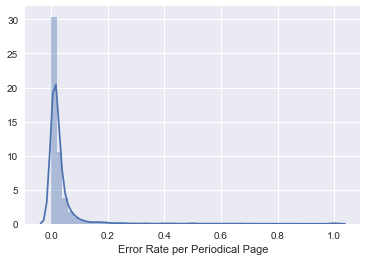

In [29]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('d', 7845),
 ('m', 6637),
 ("'", 4656),
 ('e', 4138),
 ('n', 3034),
 ('t', 2715),
 ('r', 2292),
 ('w', 2162),
 ('f', 1786),
 ('g', 1781),
 ('q', 933),
 ('x', 822),
 ('co', 683),
 ('u', 637),
 ('k', 385),
 ('mt', 343),
 ('th', 260),
 ('mo', 256),
 ('ni', 255),
 ('pa', 242),
 ('z', 240),
 ('lb', 234),
 ('oz', 232),
 ('tv', 204),
 ('-', 171),
 ('va', 158),
 ('boulder-colorado', 136),
 ('re', 136),
 ('ti', 126),
 ('io', 123),
 ('mm', 120),
 ('li', 115),
 ('al', 111),
 ('ri', 109),
 ('tion', 107),
 ('wm', 103),
 ('ft', 102),
 ('si', 102),
 ('mi', 98),
 ('ph', 97),
 ('ky', 93),
 ('nauheim', 91),
 ('oo', 87),
 ('ga', 85),
 ('es', 83),
 ('money-order', 79),
 ('se', 76),
 ('id', 76),
 ('il', 75),
 ('ll', 75)]

## Correction 7 -- Rejoin Split Words II

In [31]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction7"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LH19040701-V19-07-page15.txt: [('by', 're')]
LH19040901-V19-09-page19.txt: [('care', 'ful')]
LH19041001-V19-10-page12.txt: [('A', 'fter')]
LH19041001-V19-10-page2.txt: [('i', 'nstitutions')]
LH19041001-V19-10-page24.txt: [('absurd', 'um')]
LH19041001-V19-10-page36.txt: [('de', 'lightful')]
LH19041101-V19-11-page6.txt: [('en', 'tirely')]
LH19041101-V19-11-page8.txt: [('re', 'sponse')]
LH19041201-V19-12-page34.txt: [('by', 'Re')]
LH19050201-V20-02-page31.txt: [('So', 'ciety')]
LH19050201-V20-02-page34.txt: [('Lad', 'es')]
LH19050201-V20-02-page8.txt: [('be', 'es')]
LH19050301-V20-03-page34.txt: [('by', 'Re')]
LH19050401-V20-04-page2.txt: [('P', 'IC')]
LH19050401-V20-04-page23.txt: [('a', 're')]
LH19050401-V20-04-page27.txt: [('per', 'se')]
LH19050501-V20-05-page12.txt: [('an', 'noyances')]
LH19050601-V20-06-page29.txt: [('a', 're')]
LH19050601-V20-06-page9.txt: [('vi', 'tal')]
LH19050701-V20-07-page11.txt: [('be', 'th')]
LH19050701-V20-07-page34.txt: [('PUB', 'LISHING')]
LH19050801-V20-0

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LH/correction7

Average verified rate: 0.9785661211708095

Average of error rates: 0.033021587960560456

Total token count: 4756162



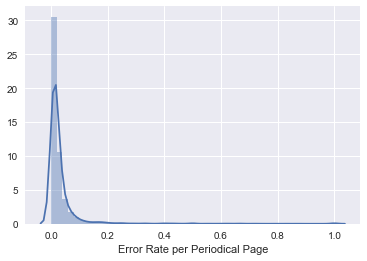

In [32]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [33]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('d', 7837),
 ('m', 6616),
 ("'", 4656),
 ('e', 4127),
 ('n', 3030),
 ('t', 2698),
 ('r', 2272),
 ('w', 2137),
 ('g', 1778),
 ('f', 1760),
 ('q', 932),
 ('x', 822),
 ('co', 683),
 ('u', 635),
 ('k', 383),
 ('mt', 343),
 ('th', 257),
 ('mo', 255),
 ('ni', 254),
 ('pa', 242),
 ('z', 240),
 ('lb', 234),
 ('oz', 232),
 ('tv', 204),
 ('-', 171),
 ('va', 156),
 ('boulder-colorado', 136),
 ('ti', 126),
 ('io', 123),
 ('mm', 120),
 ('re', 112),
 ('li', 112),
 ('tion', 107),
 ('wm', 103),
 ('al', 103),
 ('si', 102),
 ('ri', 101),
 ('ft', 100),
 ('ph', 97),
 ('mi', 94),
 ('ky', 93),
 ('nauheim', 91),
 ('oo', 86),
 ('ga', 85),
 ('money-order', 79),
 ('es', 76),
 ('feeble-minded', 75),
 ('il', 73),
 ('tt', 72),
 ('id', 72)]

## Review Remaining Errors

In [34]:
reports.docs_with_high_error_rate(summary)

[('LH19070101-V22-01-page1.txt', 1.0),
 ('LH19191001-V34-10-page14.txt', 1.0),
 ('LH19081101-V23-11-page1.txt', 1.0),
 ('LH19060601-V21-06-page1.txt', 1.0),
 ('LH19181201-V33-12-page1.txt', 1.0),
 ('LH19101101-V25-11-page1.txt', 1.0),
 ('LH19190201-V34-02-page15.txt', 1.0),
 ('LH19190801-V34-08-page1.txt', 1.0),
 ('LH19190601-V34-06-page1.txt', 1.0),
 ('LH19090501-V24-05-page1.txt', 1.0),
 ('LH19161201-V31-12-page1.txt', 1.0),
 ('LH19191001-V34-10-page15.txt', 1.0),
 ('LH19190201-V34-02-page14.txt', 1.0),
 ('LH19060401-V21-04-page1.txt', 1.0),
 ('LH19051001-V20-10-page1.txt', 1.0),
 ('LH19190501-V34-05-page4.txt', 1.0),
 ('LH19171101-V32-11-page1.txt', 1.0),
 ('LH19121001-V27-10-page1.txt', 1.0),
 ('LH19200401-V35-04-page1.txt', 1.0),
 ('LH19201201-V35-12-page4.txt', 1.0),
 ('LH19110501-V26-05-page1.txt', 1.0),
 ('LH19200601-V35-06-page1.txt', 1.0),
 ('LH19150601-V30-06-page1.txt', 0.875),
 ('LH19200601-V35-06-page4.txt', 0.87),
 ('LH19150901-V30-09-page1.txt', 0.833),
 ('LH19041001-V1

In [35]:
# %load shared_elements/high_error_rates.py
doc_keys = [x[0] for x in reports.docs_with_high_error_rate(summary) if x[1] > 0.7]

# utilities.open_original_docs(doc_keys, directories['cycle'])

Most of the problems are connected to image pages. However, there are also content pages that failed to OCR. 

In [36]:
reports.long_errors(errors_summary)

(['thirty-thirde',
  'nnnnnunminiwuwuuuuuuunuwmnnnwunwinuuuunnuuummuuununnmuuunuuunuu',
  'knowlhidden',
  'well-thought-out',
  'factorymade',
  'forty-per-cent',
  'turbulentdispositioned',
  'suspicioned',
  'malpractise',
  'ivzimiliiiilliiiiiiiiiiiiiiiiimillillilliiiiiiiiiiiiiiiiini',
  'illlllllllllllllllllllllllllllln',
  'tulimmiltillimmeeinnummum',
  'sanitariumolive',
  'webb-kenyon',
  'sour-smelling',
  'energy-producing',
  'collar-bone',
  'medico-legal',
  'lgollinillionigtougguggingollommocouggentimuggingiumgoungllimmollogigollimingtontoontunittan',
  'nasopharyngitis',
  'anirricrinimi',
  'dressing-table',
  'illadjusted',
  'subgermicides',
  'unequalized',
  'nerve-racking',
  'thirty-second',
  'cntornitscase',
  'enclosedorder',
  'flour-and-water',
  'thirty-hier',
  'fruit-growing',
  'morning-glory',
  'minvomenommmommommommommommomm',
  'admolipition',
  'hcipefulness',
  'wellprepared',
  'danish-norwegian',
  'superrenals',
  'long-drawn-out',
  'street-rail

## Correction 8 -- Remove long error strings

In [37]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = "correction7"
cycle = "correction8"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    replacements.append(clean.check_for_repeating_characters(tokens, "m|M"))
    replacements.append(clean.check_for_repeating_characters(tokens, "i|I"))
    replacements.append(clean.check_for_repeating_characters(tokens, "l|L"))
    replacements.append(clean.check_for_repeating_characters(tokens, "g|G"))
    replacements.append(clean.check_for_repeating_characters(tokens, "a|A"))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LH19041001-V19-10-page35.txt: [('ailleallataiAlleamiPaNwAINOIA', ' ')]
LH19051001-V20-10-page37.txt: [('eiventremihrittrictaaaaaaaaaa', ' ')]
LH19060101-V21-01-page36.txt: [('iirierwwerferliitieri.eAvirierrerifiliriiifieifier', ' ')]
LH19060201-V21-02-page36.txt: [("ralliVralletiliAllfettlitrifliYell'AiNaiikisi", ' ')]
LH19070601-V22-06-page2.txt: [('AAANYOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAr', ' ')]
LH19070701-V22-07-page2.txt: [('AAAAWAAWAAAAr', ' ')]
LH19070901-V22-09-page2.txt: [('AAAANYvvvvvkAAAAAAAAAAAA', ' ')]
LH19080301-V23-03-page39.txt: [('PVA.VAAVAWAVAVAAVAVAXIMMAVNAVAVAMIUMIAVAA.".-."', ' ')]
LH19080701-V23-07-page43.txt: [('llllllllllllll', ' ')]
LH19081201-V23-12-page1.txt: [('.aiMmimmwiNmmiwsr', ' ')]
LH19090401-V24-04-page65.txt: [('AAINAAAAAINAANNAAN', ' '), ('"WAAAWAAMAAAAAAAAAAAMAAAAAMAAAAAA', ' ')]
LH19090801-V24-08-page36.txt: [('MIlfelltellfellt', ' ')]
LH19090801-V24-08-page56.txt: [('llllllllllllll', ' ')]
LH19110701-V26-07-page59.txt: [('llrelldWilidll', ' ')]
LH1911

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LH/correction8

Average verified rate: 0.9786625901421141

Average of error rates: 0.03288365334717177

Total token count: 4755685



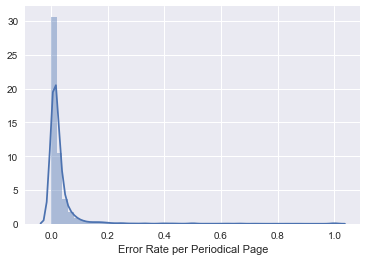

In [38]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [39]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('d', 7837),
 ('m', 6610),
 ("'", 4656),
 ('e', 4127),
 ('n', 3029),
 ('t', 2697),
 ('r', 2272),
 ('w', 2137),
 ('g', 1778),
 ('f', 1760),
 ('q', 932),
 ('x', 822),
 ('co', 683),
 ('u', 635),
 ('k', 383),
 ('mt', 343),
 ('th', 257),
 ('mo', 255),
 ('ni', 254),
 ('pa', 242),
 ('z', 240),
 ('lb', 234),
 ('oz', 232),
 ('tv', 204),
 ('-', 170),
 ('va', 156),
 ('boulder-colorado', 136),
 ('ti', 126),
 ('io', 123),
 ('mm', 120),
 ('re', 112),
 ('li', 112),
 ('tion', 107),
 ('wm', 103),
 ('al', 103),
 ('si', 102),
 ('ri', 101),
 ('ft', 100),
 ('ph', 97),
 ('mi', 93),
 ('ky', 93),
 ('nauheim', 91),
 ('oo', 86),
 ('ga', 85),
 ('money-order', 79),
 ('es', 76),
 ('feeble-minded', 75),
 ('il', 73),
 ('tt', 72),
 ('id', 72)]

## Correction 9 -- Separate Squashed Words

In [40]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = "correction8"
cycle = "correction9"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = utilities.readfile(directories['prev'], filename)
    clean.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = utilities.strip_punct(content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = clean.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if clean.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LH19040901-V19-09-page2.txt: [('SANITARIUMSANITARIUM', 'SANITARIUM SANITARIUM')]
LH19050901-V20-09-page4.txt: [('advertisingsubmitted', 'advertising submitted')]
LH19061201-V21-12-page37.txt: [('formalinpermanganate', 'formalin permanganate')]
LH19070201-V22-02-page21.txt: [('turbulentdispositioned', 'turbulent disposition ed')]
LH19070501-V22-05-page11.txt: [('appetitesatisfying', 'appetite satisfying')]
LH19070501-V22-05-page4.txt: [('GUARANTEEadvertisement', 'GUARANTEE advertisement')]
LH19070601-V22-06-page20.txt: [('practicallysterile', 'practically sterile')]
LH19070901-V22-09-page4.txt: [('GUARANTEEadvertisement', 'GUARANTEE advertisement')]
LH19071001-V22-10-page7.txt: [('GUARANTEEadvertisement', 'GUARANTEE advertisement')]
LH19080101-V23-01-page52.txt: [('LocationBeautifully', 'Location Beautifully')]
LH19081001-V23-10-page48.txt: [('Recommendsformeverywhere', 'Recommend s form everywhere')]
LH19090301-V24-03-page62.txt: [('MENANDWOMENTELLOFWONDERFULSUCCESSequip', 'MEN AND WOM

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LH/correction9

Average verified rate: 0.9786814191445233

Average of error rates: 0.03284172288531396

Total token count: 4755992



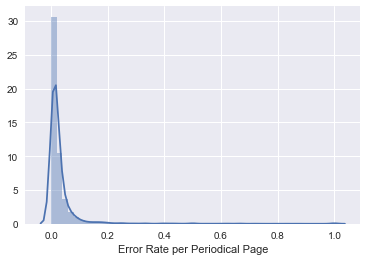

In [41]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [42]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('d', 7837),
 ('m', 6610),
 ("'", 4656),
 ('e', 4127),
 ('n', 3035),
 ('t', 2698),
 ('r', 2274),
 ('w', 2137),
 ('g', 1779),
 ('f', 1761),
 ('q', 932),
 ('x', 822),
 ('co', 683),
 ('u', 636),
 ('k', 383),
 ('mt', 343),
 ('th', 257),
 ('mo', 255),
 ('ni', 254),
 ('pa', 242),
 ('z', 240),
 ('lb', 234),
 ('oz', 232),
 ('tv', 204),
 ('-', 170),
 ('va', 156),
 ('boulder-colorado', 136),
 ('ti', 126),
 ('io', 123),
 ('mm', 120),
 ('re', 112),
 ('li', 112),
 ('tion', 107),
 ('wm', 103),
 ('al', 103),
 ('si', 102),
 ('ri', 101),
 ('ft', 100),
 ('ph', 97),
 ('mi', 93),
 ('ky', 93),
 ('nauheim', 91),
 ('oo', 86),
 ('ga', 85),
 ('money-order', 79),
 ('es', 76),
 ('feeble-minded', 75),
 ('il', 73),
 ('tt', 72),
 ('id', 72)]